<a href="https://colab.research.google.com/github/ccsuehara/Content-Analysis-2020/blob/master/HW7_doing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths
from os import listdir 
import re
from stop_words import get_stop_words
stop_words = get_stop_words('es')

# comp-linguistics
import spacy
import nltk
from spacy import displacy
#Using NLP in spanish
nlp = spacy.load("es")

In [0]:
#pip install gensim==3.8.1

In [0]:
#pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git
#!python -m spacy download es
#pip install stop-words
#pip install gensim==3.8.1

In [0]:
def loadcorpus2(corpus_name, corpus_style="text"):
    texts_raw = {}
    for file in listdir(corpus_name + "/"):
        file2 = corpus_name + "/" + file
        print(file)
        texts_raw[file] = []
        with open(file2, encoding='utf-8') as f:
            for line in f:
                texts_raw[file].append(line)
    return texts_raw

def clean_raw_text2(raw_texts):
    clean_texts = []
    for text in raw_texts:
        try:
            if type(text) == bytes:
                text = text.decode("utf-8")
            clean_text = text.replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d")
            clean_text = clean_text.replace("\n", "").replace("\xa0", "").replace("\x0c", "")
            if not (clean_text == '' or clean_text == ' '):
                clean_texts.append(clean_text)
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    return ' '.join(clean_texts)

In [42]:
speeches_dir = '/content/txt'
speeches_raw = loadcorpus2(speeches_dir)

speech = pandas.DataFrame()
filenames = []
raw = []
for filename, raw_speech in speeches_raw.items():
    filenames.append(filename)
    raw.append(raw_speech)
speech['filename'] = filenames
speech['raw text'] = raw

pattern = re.compile('[0-9]{4}')
speech['year'] = speech['filename'].apply(lambda x: pattern.search(x).group(0))
speech = speech.sort_values(by='year').reset_index(drop=True)
speech['cleaned text'] = speech['raw text'].apply(lambda x: clean_raw_text2(x))
speech.loc[(speech['year'].astype('int32') <= 1984), 'administration'] = 'Belaunde'

speech.loc[(speech['year'].astype('int32') >= 1985) & \
           (speech['year'].astype('int32') <= 1989), 'administration'] = 'Garcia (1)'

speech.loc[(speech['year'].astype('int32') >= 1990) & \
           (speech['year'].astype('int32') <= 1994), 'administration'] = 'Fujimori(1)'

speech.loc[(speech['year'].astype('int32') >= 1995) & \
           (speech['year'].astype('int32') <= 2000), 'administration'] = 'Fujimori(2)'

speech.loc[(speech['year'].astype('int32') >= 2001) & \
           (speech['year'].astype('int32') <= 2005), 'administration'] = 'Toledo'

speech.loc[(speech['year'].astype('int32') >= 2006) & \
           (speech['year'].astype('int32') <= 2010), 'administration'] = 'Garcia (2)'

speech.loc[(speech['year'].astype('int32') >= 2011) & \
           (speech['year'].astype('int32') <= 2015), 'administration'] = 'Humala'

speech.loc[(speech['year'].astype('int32') >= 2016), 'administration'] = 'Kuzcynski/Vizcarra'

speech.loc[(speech['year'].astype('int32') <= 1984), 'president'] = 'Belaunde'
speech.loc[(speech['year'].astype('int32') >= 1985) & \
           (speech['year'].astype('int32') <= 1989), 'president'] = 'Garcia'

speech.loc[(speech['year'].astype('int32') >= 1990) & \
           (speech['year'].astype('int32') <= 2000), 'president'] = 'Fujimori'

speech.loc[(speech['year'].astype('int32') >= 2001) & \
           (speech['year'].astype('int32') <= 2005), 'president'] = 'Toledo'

speech.loc[(speech['year'].astype('int32') >= 2006) & \
           (speech['year'].astype('int32') <= 2010), 'president'] = 'Garcia'

speech.loc[(speech['year'].astype('int32') >= 2011) & \
           (speech['year'].astype('int32') <= 2015), 'president'] = 'Humala'

speech.loc[(speech['year'].astype('int32') >= 2016) & \
           (speech['year'].astype('int32') <= 2017), 'president'] = 'Kuzcynski'

speech.loc[(speech['year'].astype('int32') >= 2018), 'president'] = 'Vizcarra'

speech['year-president'] = speech['year'] + '-' + speech['president']


mensaje-2009-ag.txt
mensaje-1985-ag.txt
mensaje-1991-af.txt
mensaje-1988-ag.txt
mensaje-2012-oh.txt
mensaje-1982-fbt.txt
mensaje-1994-af.txt
mensaje-1986-ag.txt
mensaje-1997-af.txt
mensaje-2001-at.txt
mensaje-1987-ag.txt
mensaje-1996-af.txt
mensaje-2007-ag.txt
mensaje-1981-fbt.txt
mensaje-2008-ag.txt
mensaje-1992-af.txt
mensaje-2011-oh.txt
mensaje-2019-01-vizcarra.txt
mensaje-2016-ppk.txt
mensaje-2018-4.txt
mensaje-2004-at.txt
mensaje-2006-ag.txt
mensaje-2017-ppk.txt
mensaje-2000-af.txt
mensaje-2014-oh.txt
mensaje-2002-at.txt
mensaje-1980-fbt.txt
mensaje-1995-af.txt
mensaje-2003-at.txt
mensaje-2005-at.txt
mensaje-1998-af.txt
mensaje-1990-af.txt
mensaje-2013-oh.txt
mensaje-1999-af.txt
mensaje-2015-oh.txt
mensaje-1984-fbt.txt
mensaje-2010-ag.txt
mensaje-1983-fbt.txt
mensaje-1989-ag.txt
mensaje-1993-af.txt


### Exercise 1 
Construct cells immediately below this that embed documents related to your final project using at least two different specification of word2vec, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why?

Stretch: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

First of all we do the standarized procedures to clean our text and get tokenized sentences we can analyze. Next, we interrogate our corpora about the presidential speeches in Peru for 1980-2020

In [0]:
speech['tokenized_sents'] = speech['cleaned text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
speech['normalized_sents'] = speech['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s, stop_words) for s in x])

In [0]:
speechW2V = gensim.models.word2vec.Word2Vec(speech['normalized_sents'].sum())

The following words, in the word vector space, reveal plenty of meaningful relations between important words of the discourse. For the first case, _presidente_ or president's most similar words are _congreso_ (congress), _republica_ (republic) and _mensaje_ (message).  
Also, for _pueblo_(people), the most similar words are _peru_, _pais_(country) and _democracia_(democracy).

In [17]:
speechW2V.most_similar('presidente')

[('congreso', 0.9991334676742554),
 ('república', 0.9989370107650757),
 ('constitucional', 0.9987812638282776),
 ('mensaje', 0.9986284971237183),
 ('doctor', 0.9985166192054749),
 ('congresistas', 0.9984062314033508),
 ('señores', 0.9983622431755066),
 ('alberto', 0.9982848167419434),
 ('representantes', 0.998271107673645),
 ('fujimori', 0.9982558488845825)]

In [18]:
speechW2V.most_similar('pueblo')

[('democracia', 0.9998525381088257),
 ('país', 0.9998388290405273),
 ('viene', 0.9998328685760498),
 ('importante', 0.9998324513435364),
 ('proceso', 0.9998313784599304),
 ('dar', 0.9998301267623901),
 ('ello', 0.9998239874839783),
 ('hacer', 0.9998239278793335),
 ('situación', 0.9998228549957275),
 ('todas', 0.9998226165771484)]

In [19]:
speechW2V.most_similar('desarrollo')

[('política', 0.9998262524604797),
 ('justicia', 0.9998210072517395),
 ('sistema', 0.9998000264167786),
 ('plan', 0.9997943043708801),
 ('crecimiento', 0.9997720718383789),
 ('economía', 0.999770998954773),
 ('apoyo', 0.9997698664665222),
 ('participación', 0.9997670650482178),
 ('vida', 0.999761164188385),
 ('empleo', 0.9997572302818298)]

Among the following words, the one that doesn't match, interestingly, is _peruano_ (peruvian)

In [20]:
speechW2V.doesnt_match(['pueblo', 'crecimiento', 'desarrollo','país', 'peruano'])

'peruano'

Given an scenario of word operations, we see that given the positive spectrum conformed by _empleo_ (employment) and _crecimiento_ (growth), the word operation that matches _salud_ (health)'s top five are, very interestingly, _violencia_ (violence), _inflacion_(inflation) and _reduccion_ (reduction).




In [25]:
speechW2V.most_similar(positive=['empleo', 'crecimiento'], negative = ['salud'])

[('democracia', 0.9996140599250793),
 ('programa', 0.9995926022529602),
 ('país', 0.9995904564857483),
 ('patria', 0.9995757341384888),
 ('proceso', 0.9995754361152649),
 ('siempre', 0.9995728135108948),
 ('libertad', 0.9995718002319336),
 ('economía', 0.999569296836853),
 ('perú', 0.9995672106742859),
 ('hacer', 0.9995667934417725)]

In [0]:
numWords = 50
targetWords = speechW2V.wv.index2word[:numWords]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(speechW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.626755  , -0.31854427, -0.04329553, ...,  0.0785812 ,
        -0.5649235 ,  0.07711159],
       [ 0.6642579 , -0.29788136, -0.03236215, ...,  0.00821937,
        -0.5561132 ,  0.06054041],
       [ 0.6155908 , -0.21255687, -0.09474986, ..., -0.10912378,
        -0.5303328 , -0.00415806],
       ...,
       [ 0.51016146, -0.17816848, -0.07482561, ..., -0.0789876 ,
        -0.4542458 , -0.00685535],
       [ 0.7474067 , -0.22370674, -0.11958396, ..., -0.1265852 ,
        -0.5726065 , -0.04887962],
       [ 0.45364478, -0.15827224, -0.06940781, ..., -0.07169347,
        -0.4081765 , -0.00583698]], dtype=float32)

In [0]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

for the following analysis of word clouds i examined different specifications of TNSE: The size of neighbors changes the distribution, as well as using the PCA instead of using TNSE (I decided to present it separately so each visualization can be better appreciated). It is interesting to see how key words that always go together in text, also go together here (like mil millones, and sole dolares). The visualizations that let you appreciate the relations between the words the better are the TNSE, more than the PCA. 

Using perplexity of 30:

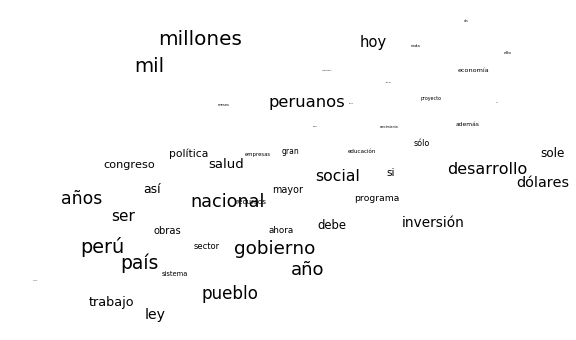

In [0]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [0]:
pcaWords2 = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data2 = pcaWords2.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords2 = sklearn.manifold.TSNE(n_components = 2,perplexity=50).fit_transform(reducedPCA_data2)

Using perplexity of 50

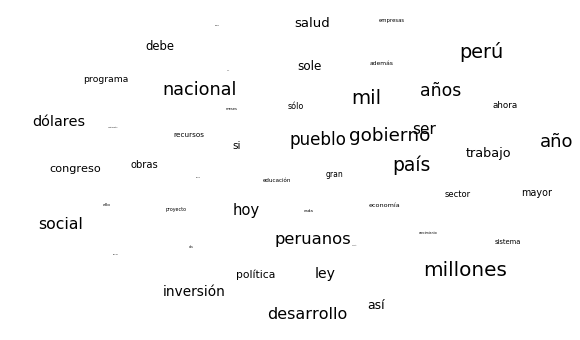

In [0]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords2[:, 0], tsneWords2[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords2[:, 0][i],tsneWords2[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

Using the PCA: 

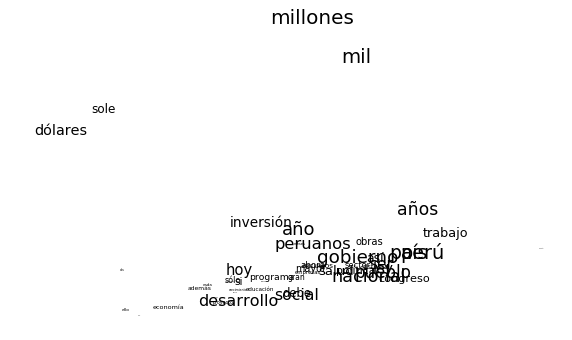

In [0]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reducedPCA_data2[:, 0], reducedPCA_data2[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (reducedPCA_data2[:, 0][i],reducedPCA_data2[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

### Exercise 2
Construct cells immediately below this that embed documents related to your final project using doc2vec, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc x_ + word _y), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

In the next section we will explore the doc2vec relations, we will start exploring the relations with a group of words. 


In [0]:
keywords = ['corrupción','social', 'economía', 'educación', 'salud', 'trabajo']

In [0]:
speech['tokenized_words'] = speech['cleaned text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
speech['normalized_words'] = speech['tokenized_words'].apply(lambda x: lucem_illud_2020.normalizeTokens(x,stop_words,lemma = False))

In [0]:
taggedDocs = []
for index, row in speech.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['year-president'])
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = docKeywords))
speech['TaggedAbstracts'] = taggedDocs

In [46]:
speech['year-president'].unique()

array(['1980-Belaunde', '1981-Belaunde', '1982-Belaunde', '1983-Belaunde',
       '1984-Belaunde', '1985-Garcia', '1986-Garcia', '1987-Garcia',
       '1988-Garcia', '1989-Garcia', '1990-Fujimori', '1991-Fujimori',
       '1992-Fujimori', '1993-Fujimori', '1994-Fujimori', '1995-Fujimori',
       '1996-Fujimori', '1997-Fujimori', '1998-Fujimori', '1999-Fujimori',
       '2000-Fujimori', '2001-Toledo', '2002-Toledo', '2003-Toledo',
       '2004-Toledo', '2005-Toledo', '2006-Garcia', '2007-Garcia',
       '2008-Garcia', '2009-Garcia', '2010-Garcia', '2011-Humala',
       '2012-Humala', '2013-Humala', '2014-Humala', '2015-Humala',
       '2016-Kuzcynski', '2017-Kuzcynski', '2018-Vizcarra',
       '2019-Vizcarra'], dtype=object)

In [47]:
speechD2V = gensim.models.doc2vec.Doc2Vec(speech['TaggedAbstracts'], size = 100) #Limiting to 100 dimensions

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


For the case of _peruanos_(male peruvians) and _bienestar_ (welfare), the most proximate distance to _peruanas_ (female peruvians) is _empleo_ (employment).

In [52]:
speechD2V.most_similar(positive = ['peruanos','bienestar'], negative = ['peruanas'], topn = 1)

[('empleo', 0.9993563294410706)]

Checking which documents are the most similar to the word _corrupcion_ (corruption), when we project this word to the document space, the nearest documents are 1981-Belaunde, 1990-Fujimori, 1998-Belaunde and 2010-Garcia (which coincidentaly, were very corrupt government, which is kind of saying that these presidents talk about corruption when they, themselves, are doing it!). It is interesting to see the contexts of the other words too.

In [49]:
speechD2V.docvecs.most_similar([ speechD2V['corrupción'] ], topn=10 )

[('social', 0.9992519021034241),
 ('salud', 0.9990016222000122),
 ('trabajo', 0.9989219903945923),
 ('economía', 0.9979709386825562),
 ('educación', 0.9975549578666687),
 ('1981-Belaunde', 0.9965356588363647),
 ('1990-Fujimori', 0.9944753646850586),
 ('1998-Fujimori', 0.9926292300224304),
 ('1983-Belaunde', 0.9888675212860107),
 ('2010-Garcia', 0.9801508188247681)]

In [53]:
speechD2V.docvecs.most_similar([ speechD2V['futuro'] ], topn=10 )

[('trabajo', 0.9994806051254272),
 ('salud', 0.9994577169418335),
 ('social', 0.9991415739059448),
 ('economía', 0.9990865588188171),
 ('educación', 0.9981585741043091),
 ('1981-Belaunde', 0.9959354400634766),
 ('1998-Fujimori', 0.9950671792030334),
 ('1990-Fujimori', 0.9949550628662109),
 ('1983-Belaunde', 0.9872598052024841),
 ('2000-Fujimori', 0.9819588661193848)]

In [54]:
speechD2V.docvecs.most_similar([ speechD2V['familia'] ], topn=10 )

[('trabajo', 0.9986686706542969),
 ('social', 0.9986422061920166),
 ('educación', 0.9985730648040771),
 ('economía', 0.9985113739967346),
 ('salud', 0.99840247631073),
 ('1981-Belaunde', 0.9970935583114624),
 ('1998-Fujimori', 0.9918519258499146),
 ('1983-Belaunde', 0.9900824427604675),
 ('1990-Fujimori', 0.9900475144386292),
 ('1982-Belaunde', 0.982699453830719)]

In [0]:
speechD2V.docvecs.most_similar([ speechD2V['muerte'] ], topn=10 )

[('trabajo', 0.9984087944030762),
 ('salud', 0.9983484745025635),
 ('economía', 0.998134970664978),
 ('educación', 0.9976803064346313),
 ('social', 0.9970999956130981),
 ('1981-Belaunde', 0.9968152046203613),
 ('2000-Fujimori', 0.9953081607818604),
 ('1990-Fujimori', 0.994830846786499),
 ('1998-Fujimori', 0.9924677610397339),
 ('1983-Belaunde', 0.9896388053894043)]

In [55]:
speechD2V.most_similar( [ speechD2V.docvecs['2000-Fujimori'] ], topn=5) 

[('luminoso', 0.9846469163894653),
 ('sino', 0.984561562538147),
 ('hombres', 0.9835989475250244),
 ('democracia', 0.9835038781166077),
 ('monetario', 0.9834660887718201)]

For the case of President Vizcarra, it is very interesting how the most similar words are many regions of Peru. He is characterized for concentrating on region's development more than the capital city, and these results make a lot of sense!

In [56]:
speechD2V.most_similar( [ speechD2V.docvecs['2019-Vizcarra'] ], topn=5) 

[('pasco', 0.9832310676574707),
 ('maría', 0.9815901517868042),
 ('apurímac', 0.9815033674240112),
 ('huancavelica', 0.9812816977500916),
 ('san', 0.9811984300613403)]

In [0]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = speechD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, speechD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

This heatmap reveals something really interesting: _corrupcion_ (corruption) is not a word you want to be near to!

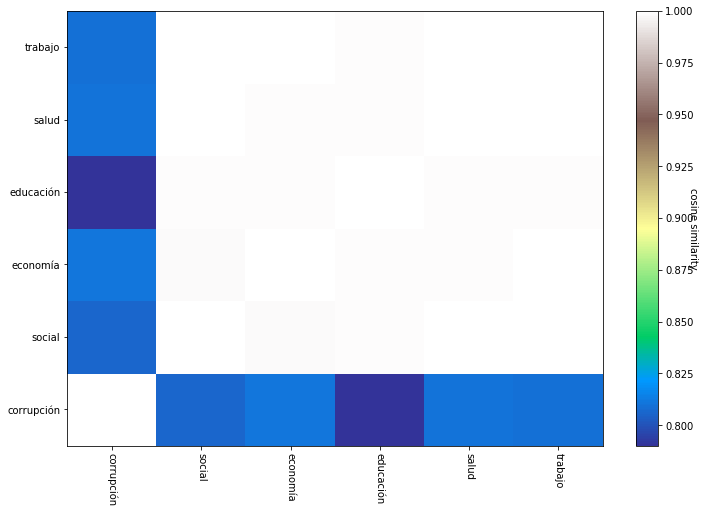

In [58]:
fig, ax = plt.subplots(figsize=(12,8))
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [0]:
targetDocs = speech['year-president'][21:]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = speechD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, speechD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

It is interesting how the heatmap shows the differences between the speeches and how interchangeable the word embeddings can be from year to year. 

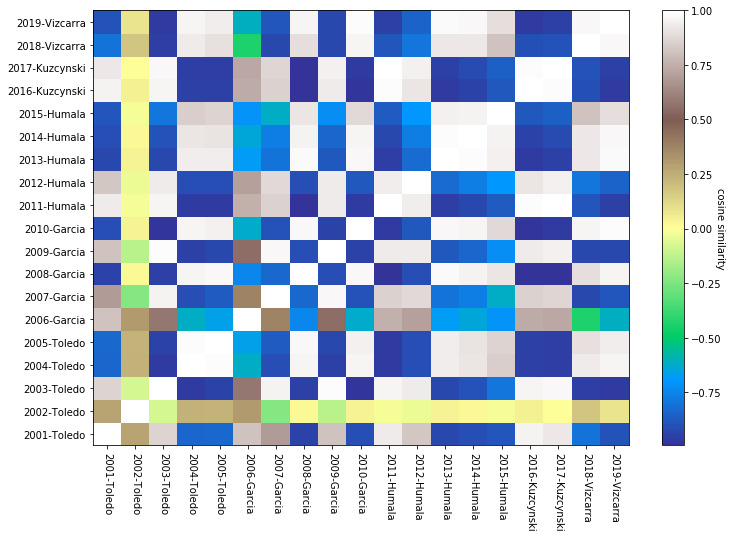

In [61]:
fig, ax = plt.subplots(figsize=(12,8))
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [0]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = speechD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, speechD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

There are prsidents that are more related with certain topics than others, and this is a good way to visualize it.

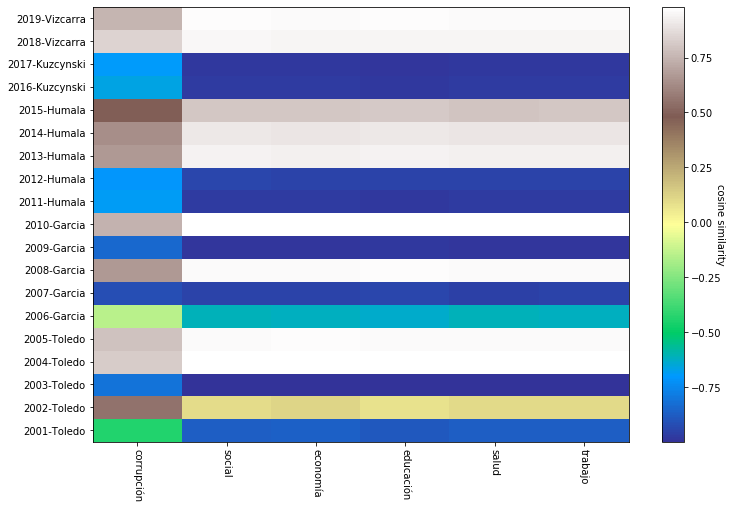

In [63]:
fig, ax = plt.subplots(figsize=(12,8))
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why? 

<span style="color:red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

For the next section i create the following dimentions:
Priority: If policies have a more people oriented or market oriente focus.  
Wealth: Dimention associated with either abundance or poverty.   
Success: Dimention that talks about either success or failure. 

The fields that will vary among these dimentions will be:
Occupations: jobs. 
Center: either talks about the capital, lima (center of economic power) or other provinces or regions.  
Temas: possible topics that emerge in the presidential speech (like economy, health, employment, etc). 


In [0]:
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
speechW2V_ = gensim.models.word2vec.Word2Vec(speech['normalized_sents'].sum())
word_vectors = speechW2V_.wv
fname = get_tmpfile("vectors.kv")
word_vectors.save(fname)
word_vectors = KeyedVectors.load(fname, mmap='r')

In [0]:
word_vectors

In [0]:
#words to create dimensions
tnytTargetWords = ['social', 'desarrollo', 'privado', 'exportar','exportación',
                   'pobreza','pobres', 'ricos','riqueza','exceso', 'inflación']
#words we will be mapping
tnytTargetWords += ["ciudadanos", "ciudadanas", "peruanos", "peruanas","pueblo", "niño",  "niños",
                    'policía', 'enfermeras',  'abogado', 'derecho','abogados','ingeniería',
                    'ingeniero', 'doctores', 
                    "lima", "capital", "provincias", "regiones", "local", "distritos","arequipa", "cuzco", "cusco", "tacna", "ica",
                    "moquegua", "amazonas", "tumbes", "piura"]


wordsSubMatrix = []
for word in tnytTargetWords:
    wordsSubMatrix.append(word_vectors[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [0]:
pcaWords_speech = sklearn.decomposition.PCA(n_components = 30).fit(wordsSubMatrix)
reducedPCA_speech = pcaWords_speech.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords_speech = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_speech)

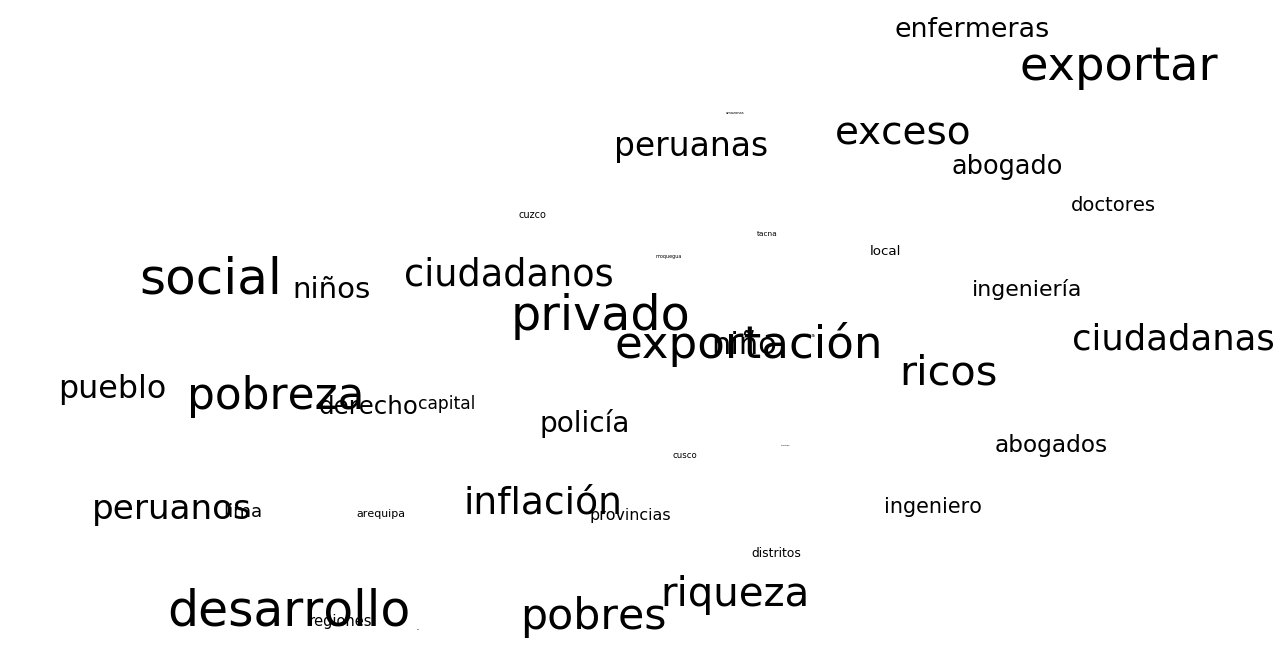

In [71]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords_speech[:, 0], tsneWords_speech[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWords_speech[:, 0][i],tsneWords_speech[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

In [0]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [0]:
Priority = dimension(word_vectors, ['social', 'desarrollo', 'pueblo'],
                     ['privado', 'empresario','mercado', 'capital'])
Success = dimension(word_vectors, ['logros', 'logro', 'éxito', 'triunfo', 'acierto','prosperidad']
                   ,['quiebra', 'derrota', 'caída'])
Wealth = dimension(speechW2V_, ['riqueza','rico','bienestar','crecimiento','bueno'],
                  ['pobreza', 'inflación','carencia', 'falta'])

In [0]:
Occupations = ['policía', 'enfermeras',  'abogado', 'derecho','abogados','ingeniería','ingeniero', 'doctores']
Center = ["lima", "capital", "provincias", "regiones", "local", "distritos", "tacna",
                    "moquegua", "amazonas", "piura"]
Temas = ['salud', 'educación', 'trabajo', 'empleo', 'economía', 'seguridad', 'agua', 'saneamiento', 'vivienda']

In [0]:
def makeDF(model, word_list):
    p = []
    w = []
    c = []
    for word in word_list:
        p.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Priority.reshape(1,-1))[0][0])
        w.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Success.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Wealth.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'priority': p, 'wealth': w, 'success':c}, index = word_list)
    return df

In [0]:
OCCdf = makeDF(word_vectors, Occupations) 
Citdf = makeDF(word_vectors, Temas)
Centdf = makeDF(word_vectors, Center)

In [0]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

Here it is interesting to see how _doctores_ (doctors) are far away from the rest of occupations.

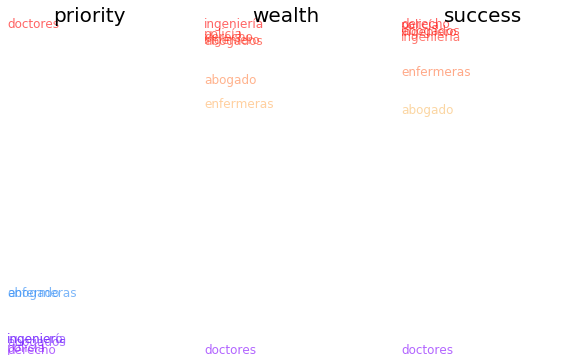

In [78]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'priority')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'wealth')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, OCCdf, 'success')
plt.show()

Given the discourse of giving more focus to regions, it makes sense that priority and success have a lot of regional components, nevertheless, when talking about wealth, the capital, and lima, are more on top than other words.

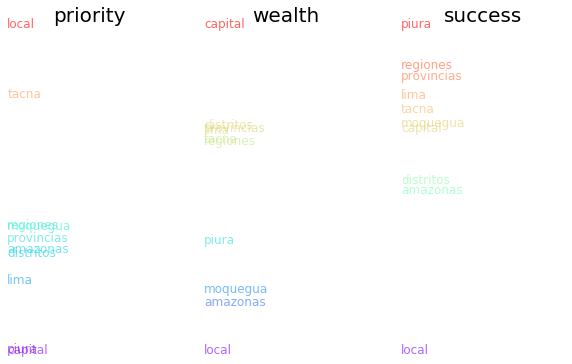

In [79]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Centdf, 'priority')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Centdf, 'wealth')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Centdf, 'success')
plt.show()

It is interesting that here, _agua_ (water) and _saneamiento_(sanitation) are both in the bottom distribution of wealth and success, given that they are two of the most forgotten topics in politics. As expected, _educacion_ (education) is a very important topic in success given the big success in later years in peruvian education.

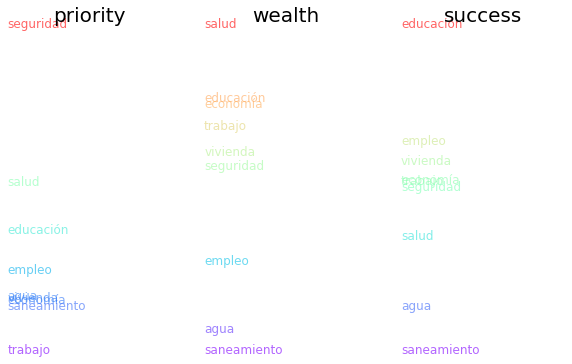

In [80]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Citdf, 'priority')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Citdf, 'wealth')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Citdf, 'success')
plt.show()

In [0]:
import copy
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [0]:
# def compareModels(df, category, sort = True):
#     """If you are using time as your category sorting is important"""
#     embeddings_raw = {}
#     cats = sorted(set(df[category]))
#     for cat in cats:
#         #This can take a while
#         print("Embedding {}".format(cat), end = '\r')
#         subsetDF = df[df[category] == cat]
#         #You might want to change the W2V parameters
#         embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF['normalized_sents'].sum())
#     #These are much quicker
#     embeddings_aligned = {}
#     for catOuter in cats:
#         embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
#         for catInner in cats:
#             embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
#     return embeddings_raw, embeddings_aligned


def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned


def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

In [0]:
# speech['tokenized_sents'] = speech['clean text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
# ascoDF['normalized_sents'] = ascoDF['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [0]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

For the following section we checked at three of the words that are more important for the presidential speeches. _pais_ (country) is an interesting case: The meaning of the word has stabilized in the the decade of 2010's with 0 linguistic change. 
Also, the word _gobierno_ (government) is one that varies from presidential term to presidential term. 


país


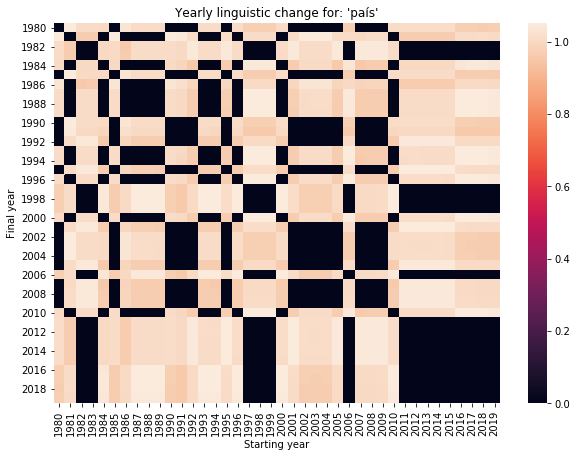

In [0]:
targetWord = 'país'
pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

gobierno


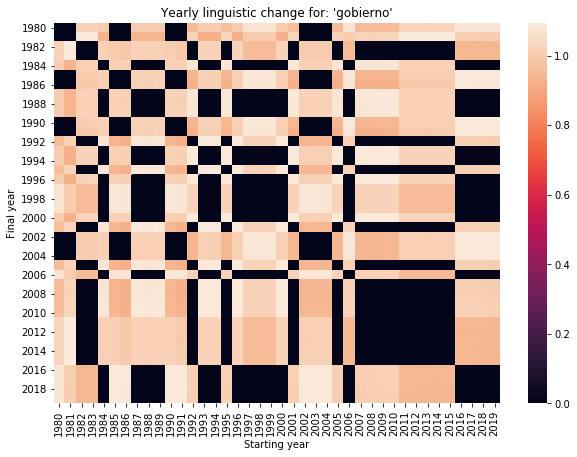

In [0]:
targetWord = 'gobierno'
pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

perú


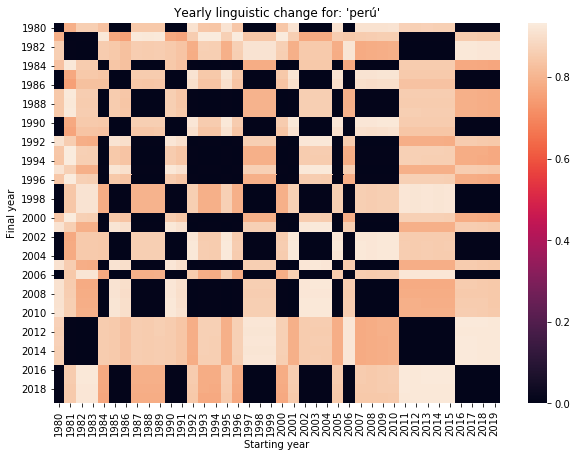

In [0]:
targetWord = 'perú'
pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()